### 데이터 분석
diff_percentage = (upbit_price / binance_price -1) *100

In [53]:
# 5분봉 데이터 
import pandas as pd
df_krw = pd.read_csv('DATA/btc_diff_percentage_2023.csv').drop(columns='Unnamed: 0')
df_krw['Open time']=pd.to_datetime(df_krw['Open time'])

In [54]:
# 결측치 확인 (바이낸스 점검으로 결측값이 존재)
df_krw.isna().sum()

Open time           0
Upbit               0
Binance            16
diff               16
diff_percentage    16
dtype: int64

In [55]:
df_krw = df_krw.dropna(subset=['Binance'], ignore_index=True) # 2023년 거래 일시중지로 인한 결측값 제거
df_krw

,Open time,Upbit,Binance,diff,diff_percentage
0,2023-01-01 00:00:00,21064000.0,2.095529e+07,108712.926,0.518785
1,2023-01-01 00:05:00,21040000.0,2.094425e+07,95751.109,0.457171
2,2023-01-01 00:10:00,21012000.0,2.093667e+07,75329.563,0.359797
3,2023-01-01 00:15:00,21010000.0,2.095473e+07,55270.538,0.263762
4,2023-01-01 00:20:00,21048000.0,2.095549e+07,92510.158,0.441460
...,...,...,...,...,...
105099,2023-12-31 23:35:00,57070000.0,5.445278e+07,2617219.660,4.806402
105100,2023-12-31 23:40:00,57072000.0,5.446566e+07,2606338.554,4.785288
105101,2023-12-31 23:45:00,57080000.0,5.450272e+07,2577281.198,4.728720
105102,2023-12-31 23:50:00,57018000.0,5.444118e+07,2576824.260,4.733227


In [56]:
df_krw.describe()

,Open time,Upbit,Binance,diff,diff_percentage
count,105104,1.051040e+05,1.051040e+05,1.051040e+05,105104.000000
mean,2023-07-02 12:17:31.755404032,3.834329e+07,3.766799e+07,6.753042e+05,1.673043
min,2023-01-01 00:00:00,2.101000e+07,2.092221e+07,-1.779489e+06,-3.866144
25%,2023-04-02 06:58:45,3.503700e+07,3.422620e+07,2.549964e+05,0.732531
50%,2023-07-02 12:37:30,3.712200e+07,3.669494e+07,5.412912e+05,1.523371
75%,2023-10-01 18:16:15,3.999900e+07,3.960743e+07,8.626239e+05,2.477708
max,2023-12-31 23:55:00,6.125600e+07,5.902416e+07,3.916793e+06,10.207584
std,NaN,8.322450e+06,7.882586e+06,6.671152e+05,1.317540


### 데이터 시각화

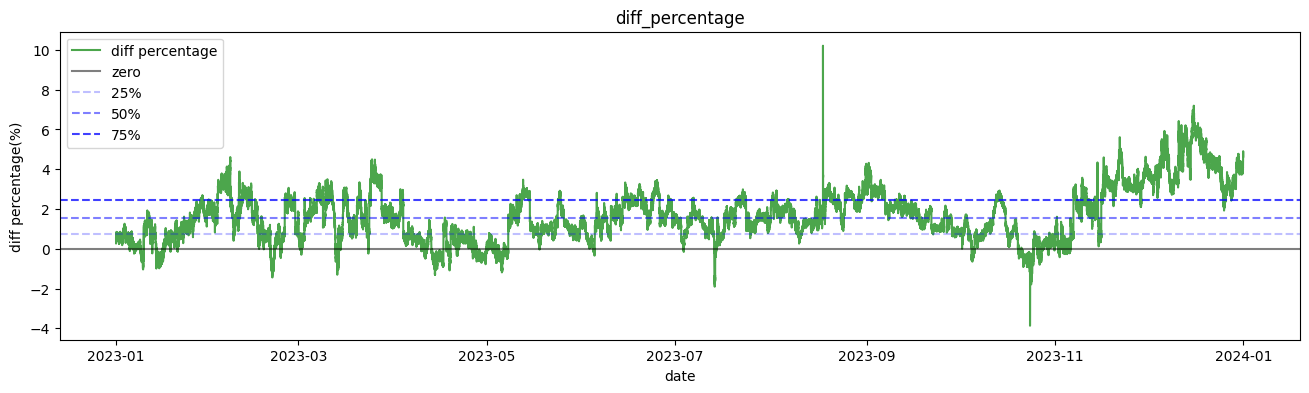

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.plot(df_krw['Open time'], df_krw['diff_percentage'], color='green', alpha =0.7, label = 'diff percentage' )
plt.axhline(y=0, color='black', linewidth=1.5, alpha =0.5, label= 'zero')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.25), color='b', linestyle='--', linewidth=1.5, alpha =0.25, label='25%')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.50), color='b', linestyle='--', linewidth=1.5, alpha =0.5, label='50%')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.75), color='b', linestyle='--', linewidth=1.5, alpha =0.75, label='75%')  # 빨간색 점선, 두께 1.5

plt.legend()
plt.ylabel("diff percentage(%)")
plt.xlabel("date")
plt.title('diff_percentage')
plt.show()

Text(0.5, 1.0, 'histogram of diff_percentage')

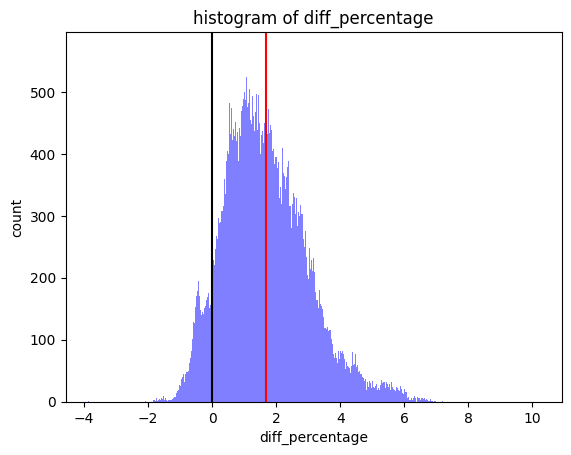

In [58]:
plt.hist(df_krw['diff_percentage'], bins=1000,color = 'b', alpha = 0.5)
plt.axvline(x = df_krw['diff_percentage'].mean(), color='r')
plt.axvline(x = 0, color='black')
plt.xlabel('diff_percentage')
plt.ylabel('count')
plt.title('histogram of diff_percentage')

### 업비트와 바이낸스 BTC 가격 차이 통계 검정
업비트의 가격이 바이낸스보다 높은 비율이 90% 이상이다라는 가설을 통계검정을 해보았습니다.

In [59]:
from scipy import stats

df_positive = (df_krw['diff_percentage'] > 0).sum()
n = len(df_krw['diff_percentage'])

stats.binomtest(df_positive, n, p=0.90, alternative='greater')

BinomTestResult(k=96643, n=105104, alternative='greater', statistic=0.9194987821586238, pvalue=5.222609464887504e-105)

그 결과는 업비트가 높은 비율이 96643/105120 이고 이는 statistic=0.9193588280060883 에 해당, pvalue는 극도로 작습니다.

따라서 대립가설을 지지하고 업비트의 가격이 바이낸스보다 높을 때가 90퍼센트 이상임을 나타냅니다.

### 시세 차이를 이용한 매매

윌콕슨 가설검정을 통해 업비트의 가격이 바이낸스보다 크다는 것이 확인 되었습니다.

이 시세 차이를 이용해 업비트와 바이낸스 가격 차이를 이용한 매매를 해봅시다.

업비트에서 비트코인 시세가 바이낸스에서보다 높다면 바이낸스에서 비트코인을 사서 업비트로 옮긴 다음 매도할 수 있습니다.

반대로 바이낸스에서 시세가 업비트에서보다 높다면 업비트에서 비트코인을 사서 바이낸스로 옮긴 다음 매도할 수 있습니다.

예를 들어 김프가 +5%고 바이낸스의 가격이 1억원이면 diff_percentage = (upbit_price / binance_price -1) *100 식에 따라 0.05 = upbit_price/1억원 -1 

upbit_price = 1.05억원 입니다. 즉 1BTC를 옮겨 팔면 500만원을 벌 수 있습니다.

하지만 매매 수수료와 출금 수수료를 고려해야합니다.

업비트의 1회 매매 수수료는 0.05%원이고 바이낸스의 매매 수수료는 0.1%원입니다.

업비트의 출금 수수료는 0.0008BTC, 바이낸스는 0.0005BTC입니다.

즉 1회 송금은 0.0013BTC의 수수료가 소모됩니다.

In [60]:
df_krw

,Open time,Upbit,Binance,diff,diff_percentage
0,2023-01-01 00:00:00,21064000.0,2.095529e+07,108712.926,0.518785
1,2023-01-01 00:05:00,21040000.0,2.094425e+07,95751.109,0.457171
2,2023-01-01 00:10:00,21012000.0,2.093667e+07,75329.563,0.359797
3,2023-01-01 00:15:00,21010000.0,2.095473e+07,55270.538,0.263762
4,2023-01-01 00:20:00,21048000.0,2.095549e+07,92510.158,0.441460
...,...,...,...,...,...
105099,2023-12-31 23:35:00,57070000.0,5.445278e+07,2617219.660,4.806402
105100,2023-12-31 23:40:00,57072000.0,5.446566e+07,2606338.554,4.785288
105101,2023-12-31 23:45:00,57080000.0,5.450272e+07,2577281.198,4.728720
105102,2023-12-31 23:50:00,57018000.0,5.444118e+07,2576824.260,4.733227


In [61]:
df_krw.loc[1, 'diff_percentage']

0.4571713671772892

In [62]:
# revp(역프) 때 원화 -> BTC 
# kimp(김프) 때 BTC -> 원화 
won_upbit = 100000000
btc_binance = 0
kimp = 1.5
revp = 0
cnt=0
in_sign = False
out_sign = True
upbit_send_fee = 0.0008
upbit_trade_fee = 0.0005
binance_send_fee = 0.0005
trade_list = list()
for i in range(len(df_krw)):
    if df_krw.loc[i,'diff_percentage']<=revp:
        if out_sign:
            btc_binance = won_upbit * ( 1 - upbit_trade_fee) / df_krw.loc[i, 'Upbit'] - upbit_send_fee
            
            trade_dict = dict()
            trade_dict['buy_date'] = df_krw.loc[i, 'Open time']
            trade_dict['buy_price'] = df_krw.loc[i, 'Upbit']
            trade_dict['kimp'] = df_krw.loc[i, 'diff_percentage']

            out_sign = False
            in_sign = True
        else:
            continue
    
    elif df_krw.loc[i,'diff_percentage']>kimp:
        if in_sign:
            won_upbit = (btc_binance - binance_send_fee) * df_krw.loc[i,'Upbit']
            
            trade_dict['sell_date'] = df_krw.loc[i, 'Open time']
            trade_dict['sell_price'] = df_krw.loc[i, 'Upbit']
            trade_dict['revp'] = df_krw.loc[i, 'diff_percentage']
            trade_dict['won_upbit'] = won_upbit

            trade_list.append(trade_dict)
            
            out_sign = True
            in_sign = False
            
        else:
            continue
    else:
        continue

print('최종 자산')
if won_upbit == 0:
    print(btc_binance, 'btc')
else: print(won_upbit, '원')
df_trade = pd.DataFrame(trade_list)
df_trade

최종 자산
144090937.29700124 원


,buy_date,buy_price,kimp,sell_date,sell_price,revp,won_upbit
0,2023-01-05 10:10:00,21429000.0,-0.020135,2023-01-11 00:50:00,22009000.0,1.556286,1.026266e+08
1,2023-01-12 17:35:00,23430000.0,-0.230491,2023-01-23 00:20:00,28547000.0,1.508003,1.249402e+08
2,2023-02-16 07:55:00,31484000.0,-0.010629,2023-02-17 02:15:00,31033000.0,1.501238,1.230485e+08
3,2023-02-17 20:25:00,31941000.0,-0.026792,2023-02-24 15:35:00,31000000.0,1.744778,1.193234e+08
4,2023-03-01 12:50:00,31258000.0,-0.011597,2023-03-03 01:20:00,30594000.0,1.517649,1.166905e+08
5,2023-03-13 00:20:00,29247000.0,-0.050821,2023-03-15 10:15:00,32469000.0,1.519160,1.294388e+08
6,2023-03-23 15:30:00,37320000.0,-0.038246,2023-03-24 00:00:00,37294000.0,2.405649,1.292355e+08
7,2023-04-09 19:15:00,37193000.0,-0.008182,2023-04-17 11:30:00,38839000.0,1.572573,1.348369e+08
8,2023-04-18 00:25:00,38543000.0,-0.021195,2023-05-08 01:40:00,37896000.0,1.726528,1.324579e+08
9,2023-05-18 03:15:00,36658000.0,-0.035826,2023-05-23 12:05:00,36636000.0,1.577238,1.322646e+08


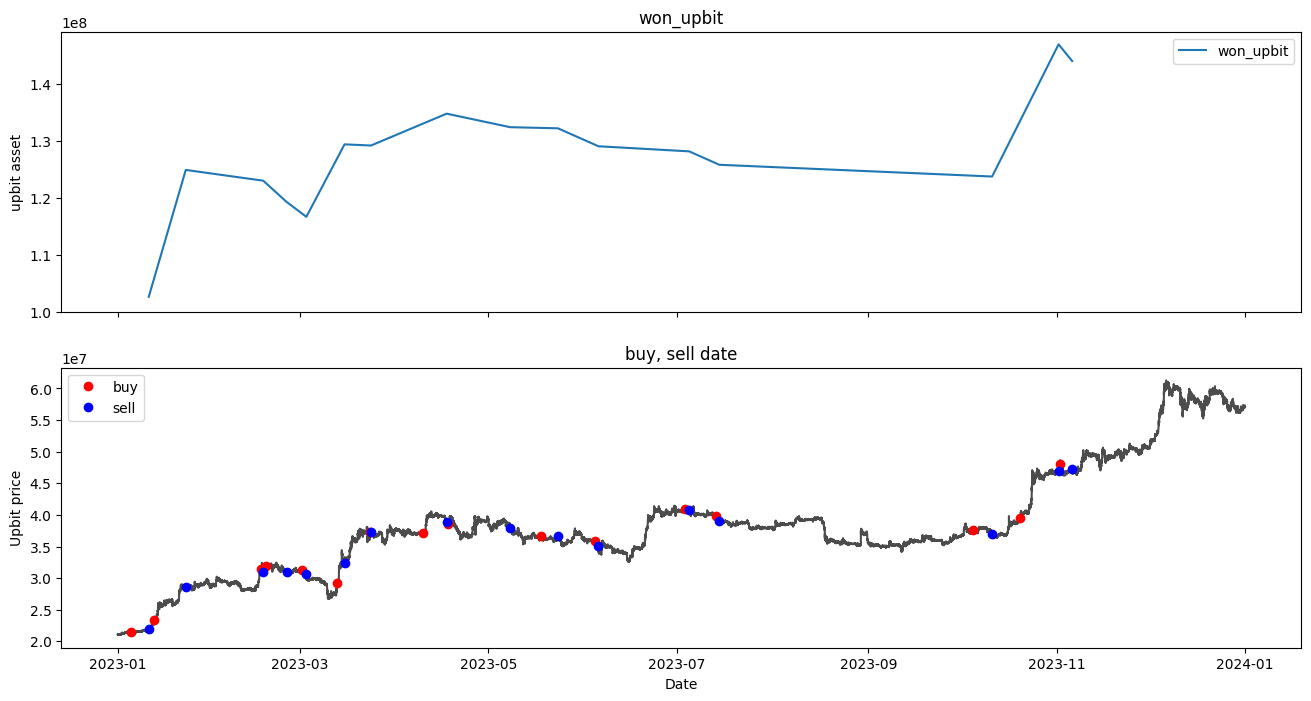

In [63]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

ax1.plot(df_trade['sell_date'], df_trade['won_upbit'], label='won_upbit')
ax1.set_ylim(bottom=1.0e8)

ax1.set_title('won_upbit')
ax1.set_ylabel("upbit asset")
ax1.legend()

ax2.plot(df_krw['Open time'], df_krw['Upbit'], color='black', alpha=0.7)
ax2.plot(df_trade['buy_date'], df_trade['buy_price'], 'ro', label='buy')
ax2.plot(df_trade['sell_date'], df_trade['sell_price'], 'bo', label='sell')
ax2.set_title('buy, sell date')
ax2.set_ylabel("Upbit price")
ax2.legend()

ax2.set_xlabel("Date")

plt.show()



매매를 했을 때 최종 자산이 증가하기는 했지만 revp 일 때 사서 kimp일 때 팔면 항상 수익이 나야되는데 그렇지 않았습니다. 

그 이유는 살 때와 팔 때 시점의 가격변동 때문입니다. 시세 변화와 함께 보면 시세가 우상향해서 자산도 비례하게 움직인 것과 같습니다.

그러나 가격이 하향할 때는 손실을 볼 리스크가 있어 이 가격변동 리스크를 해결하기 위해 바이낸스 선물거래를 이용해보겠습니다. 

### 바이낸스 선물 헷징을 이용한 매매

헷징이란 주식투자 등의 투자활동에서, 현물가격의 변동에 따라 발생할 수 있는 손실을 줄이기 위해 선물이나 옵션 등으로 시장에서 현물과 반대되는 포지션을 가지는 것입니다.

김프가 설정한 기준(revp)에 도달했을 때 업비트에서 매수를 하고 바이낸스에서 숏 포지션을 오픈합니다.

김프 상승하여 기준(kimp)에 도달했을 때 업비트에서 매도를 하고 바이낸스에서 숏 포지션을 종료합니다.


In [64]:
# revp(역프) 때 원화 -> BTC 
# kimp(김프) 때 BTC -> 원화 
#초기 자금
won_upbit = 50000000
btc_upbit = 0
won_binance = 50000000
#수수료
upbit_trade_fee = 0.0005
binance_trade_fee = 0.0005
#숏 일 때 가격
short_open = 0
short_close = 0
#김프 역프 기준
kimp = 1.5
revp = 0
buy_sign = True
sell_sign = False

trade_list = list()

for i in range(len(df_krw)):
    if df_krw.loc[i,'diff_percentage']<=revp:
        if buy_sign:
            btc_upbit = won_upbit * (1-upbit_trade_fee) / df_krw.loc[i,'Upbit']
            short_open = df_krw.loc[i, 'Binance'] * (1-binance_trade_fee)
            leverage = 1
            margin = short_open/leverage           
            
            trade_dict = dict()
            trade_dict['buy_date'] = df_krw.loc[i, 'Open time']
            trade_dict['revp'] = df_krw.loc[i, 'diff_percentage']

            buy_sign = False
            sell_sign = True
        else:
            continue
    
    elif df_krw.loc[i,'diff_percentage']>kimp:
        if sell_sign:
            won_upbit = (btc_upbit) * df_krw.loc[i,'Upbit'] * (1-upbit_trade_fee)
            short_close = df_krw.loc[i,'Binance']
            won_binance = (won_binance + won_binance * (short_open - short_close)/short_open) *(1-binance_trade_fee)

            trade_dict['sell_date'] = df_krw.loc[i, 'Open time']
            trade_dict['kimp'] = df_krw.loc[i, 'diff_percentage']

            trade_dict['won_upbit'] = won_upbit
            trade_dict['won_binance'] = won_binance
            trade_dict['won_total'] = won_upbit + won_binance
            trade_list.append(trade_dict)

            buy_sign = True
            sell_sign = False
        else:
            continue
    else:
        continue
df_trade = pd.DataFrame(trade_list)
df_trade['diff'] = df_trade['won_total'].diff().fillna(df_trade.loc[0, 'won_total']-100000000)
df_trade['diff_rate'] = df_trade['diff']/df_trade['won_total'] *100
print('최종 자산')
print(df_trade.iloc[-1]['won_total'] ,'원')
df_trade

최종 자산
112114067.47317907 원


,buy_date,revp,sell_date,kimp,won_upbit,won_binance,won_total,diff,diff_rate
0,2023-01-05 10:10:00,-0.020135,2023-01-11 00:50:00,1.556286,5.130197e+07,4.939383e+07,1.006958e+08,6.957983e+05,0.690990
1,2023-01-12 17:35:00,-0.230491,2023-01-23 00:20:00,1.508003,6.244358e+07,3.958777e+07,1.020313e+08,1.335547e+06,1.308957
2,2023-02-16 07:55:00,-0.010629,2023-02-17 02:15:00,1.501238,6.148756e+07,4.069648e+07,1.021840e+08,1.526906e+05,0.149427
3,2023-02-17 20:25:00,-0.026792,2023-02-24 15:35:00,1.744778,5.961644e+07,4.254245e+07,1.021589e+08,-2.514747e+04,-0.024616
4,2023-03-01 12:50:00,-0.011597,2023-03-03 01:20:00,1.517649,5.829170e+07,4.403086e+07,1.023226e+08,1.636664e+05,0.159951
5,2023-03-13 00:20:00,-0.050821,2023-03-15 10:15:00,1.519160,6.464871e+07,3.989211e+07,1.045408e+08,2.218266e+06,2.121914
6,2023-03-23 15:30:00,-0.038246,2023-03-24 00:00:00,2.405649,6.453909e+07,4.083136e+07,1.053704e+08,8.296288e+05,0.787345
7,2023-04-09 19:15:00,-0.008182,2023-04-17 11:30:00,1.572573,6.732793e+07,3.964709e+07,1.069750e+08,1.604564e+06,1.499943
8,2023-04-18 00:25:00,-0.021195,2023-05-08 01:40:00,1.726528,6.613155e+07,4.094270e+07,1.070742e+08,9.923523e+04,0.092679
9,2023-05-18 03:15:00,-0.035826,2023-05-23 12:05:00,1.577238,6.602578e+07,4.157612e+07,1.076019e+08,5.276520e+05,0.490374


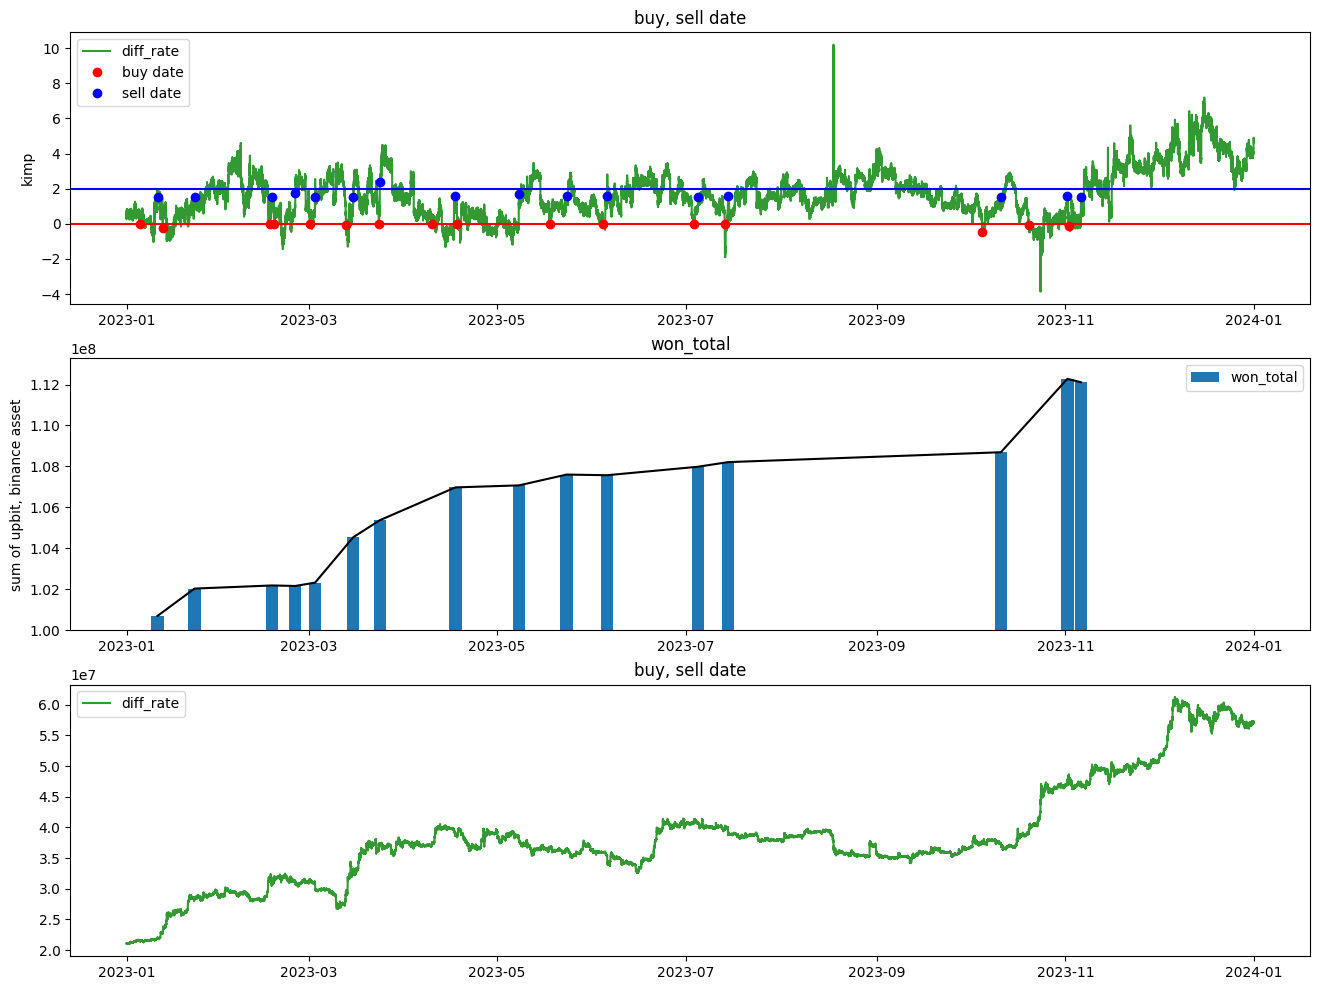

In [65]:
plt.figure(figsize=(16, 12))


ax1 = plt.subplot(3, 1, 1)
plt.plot(df_krw['Open time'], df_krw['diff_percentage'], color='g', alpha=0.8, label='diff_rate')
plt.plot(df_trade['buy_date'], df_trade['revp'], 'ro', label='buy date')
plt.plot(df_trade['sell_date'], df_trade['kimp'], 'bo', label='sell date')
plt.axhline(y=0, color='r')
plt.axhline(y=2, color='b')
plt.ylabel('kimp') 
plt.legend()
plt.title('buy, sell date')

ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.bar(df_trade['sell_date'], df_trade['won_total'], width=4, label='won_total')
plt.plot(df_trade['sell_date'], df_trade['won_total'], color='black')
plt.ylim(1e8, max(df_trade['won_total'] + 0.01e8))
plt.ylabel('sum of upbit, binance asset') 
plt.legend()
plt.title('won_total')

ax3 = plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(df_krw['Open time'], df_krw['Upbit'], color='g', alpha=0.8, label='diff_rate')
plt.legend()
plt.title('buy, sell date')

plt.show()

In [66]:
# 승률을 구해보면
winrate = len(df_trade.loc[df_trade['diff_rate']>0]) / len(df_trade)
winrate

0.8125

다른 김프, 역프 기준을 적용해보기 위해 이 매매가 거래가 일어나기 위해 필요한 김프, 역프 기준을 받아 그 결과를 리턴하는 함수를 만들어 줬습니다.

In [67]:
def get_trade_result(kimp, revp):
    won_upbit = 50000000
    btc_upbit = 0
    won_binance = 50000000
    upbit_trade_fee = 0.0005
    binance_trade_fee = 0.0005
    short_entry = 0
    short_exit = 0
    #김프 역프 기준
    buy_sign = True
    sell_sign = False

    trade_list = list()

    for i in range(len(df_krw)):
        if df_krw.loc[i,'diff_percentage']<=revp:
            if buy_sign:
                btc_upbit = won_upbit * (1-upbit_trade_fee) / df_krw.loc[i,'Upbit']
                short_open = df_krw.loc[i, 'Binance'] * (1-binance_trade_fee)
                leverage = 1
                margin = short_open/leverage           
                
                trade_dict = dict()
                trade_dict['buy_date'] = df_krw.loc[i, 'Open time']
                trade_dict['revp'] = df_krw.loc[i, 'diff_percentage']

                buy_sign = False
                sell_sign = True
            else:
                continue
        
        elif df_krw.loc[i,'diff_percentage']>kimp:
            if sell_sign:
                won_upbit = (btc_upbit) * df_krw.loc[i,'Upbit'] * (1-upbit_trade_fee)
                short_close = df_krw.loc[i,'Binance']
                won_binance = (won_binance + won_binance * (short_open - short_close)/short_open) *(1-binance_trade_fee)

                trade_dict['sell_date'] = df_krw.loc[i, 'Open time']
                trade_dict['kimp'] = df_krw.loc[i, 'diff_percentage']

                trade_dict['won_upbit'] = won_upbit
                trade_dict['won_binance'] = won_binance
                trade_dict['won_total'] = won_upbit + won_binance
                trade_list.append(trade_dict)

                buy_sign = True
                sell_sign = False
            else:
                continue
        else:
            continue

        
    df_trade = pd.DataFrame(trade_list)
    df_trade['diff'] = df_trade['won_total'].diff().fillna(df_trade.loc[0, 'won_total']-100000000)
    df_trade['diff_rate'] = df_trade['diff']/df_trade['won_total'] *100
    return df_trade

### 최적의 진입, 청산 시점 찾기

청산시점을 찾기 위해 kimp =  1.5 ~ 3.9 설정하고 revp = -1 ~ 1.4 설정,

경우의 수만큼 매매를 시뮬레이션 했을 때 각 경우의 승률을 구해보겠습니다.

아래 주석처리된 코드를 풀면 시뮬레이션 데이터를 만들고 csv로 저장합니다.

In [68]:
# #김프  1.5 ~ 3.9 설정
# #역프 = 김프 -1 ~ 1.4 설정

# #함수 한번 실행 시 1.5초, 25*25번 실행 시 약 16분 걸릴 것으로 예상

# import numpy as np
# kimp = np.arange(1.5,4,0.1)
# revp = np.arange(-1,1.5,0.1)
# df_trade_simul = pd.DataFrame()
# length = len(kimp) * len(revp)

# df_winrate=pd.DataFrame()

# cnt=0

# for k in kimp:
#     for r in revp:
#         df_trade_simul = get_trade_result(k,r)
#         df_winrate.loc[cnt, 'kimp'] = k
#         df_winrate.loc[cnt, 'revp'] = r
#         df_winrate.loc[cnt, 'winrate'] = len(df_trade_simul.loc[df_trade_simul['diff_rate']>0]) / len(df_trade_simul)
#         df_winrate.loc[cnt, 'won_total'] = df_trade_simul.iloc[-1]['won_total']
#         cnt+=1
#         print('\r', cnt,'/', length, ' 진행완료', end='')

# 데이터 만드는데 오래걸리니 저장해줍니다.

# df_winrate.to_csv('btc_kimp_winrate_2023.csv')

In [69]:
import pandas as pd
df_winrate = pd.read_csv('DATA/btc_kimp_winrate_2023.csv',index_col=0)

### 분석결과


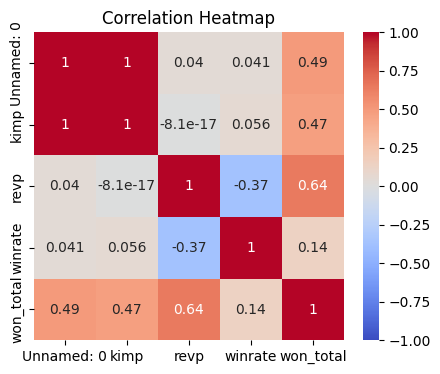

In [70]:
# 상관관계 분석
df_winrate = pd.read_csv('DATA/btc_kimp_winrate_2023.csv')
df_winrate.corr()
import seaborn as sns
plt.figure(figsize=(5, 4))
sns.heatmap(df_winrate.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

상관관계 분석 결과 0.8 이상의 큰 상관관계는 없고 revp 설정과 winrate 간의 음의 상관관계가 보임

##### 승률 분석

In [71]:
df_winrate['winrate'].describe()

count    625.000000
mean       0.734242
std        0.149760
min        0.449324
25%        0.625000
50%        0.695652
75%        0.846154
max        1.000000
Name: winrate, dtype: float64

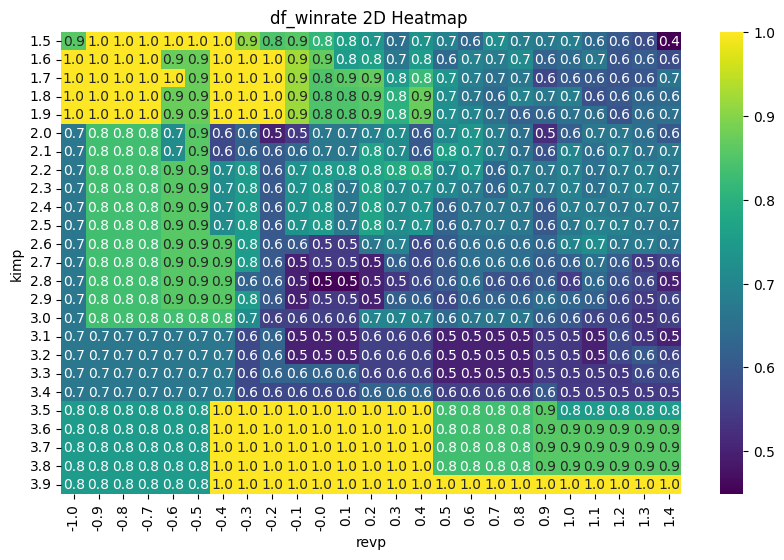

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

kimp = np.arange(1.5,4,0.1)
revp = np.arange(-1,1.5,0.1)

# 데이터 프레임에서 피벗 테이블 생성
heatmap_data = df_winrate.pivot_table(index='kimp', columns='revp', values='winrate')

# 히트맵 그리기
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.1f', cbar=True)

# 축 눈금 제거
ax.set_xticks(np.arange(0.5,25.5,1), labels=np.round(revp,2))
ax.set_yticks(np.arange(0.5,25.5,1), labels=np.round(kimp,2))

# 제목 설정
plt.title('df_winrate 2D Heatmap ')

# 그래프 보여주기
plt.show()


대체로 승률은 0.5 이상이지만 

revp = -1.0 ~ +0.4 and kimp = +1.5 ~ +1.9 ,

revp = -1.0 ~ -0.5 and kimp = +2.0 ~ +3.0 , 

revp = -1.0 ~ +1.4 and kimp = +3.5 ~ +3.9 일 때 승률이 높았다.

##### total asset 분석

In [73]:
df_winrate['won_total'].describe()

count    6.250000e+02
mean     1.179979e+08
std      9.419608e+06
min      1.066161e+08
25%      1.103955e+08
50%      1.150735e+08
75%      1.246453e+08
max      1.478697e+08
Name: won_total, dtype: float64

최소 6% 수익, 최대 47% 수익


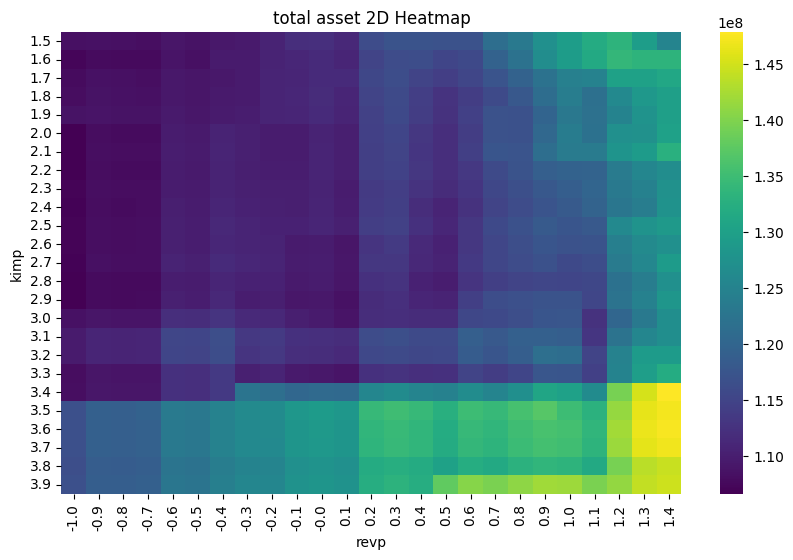

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 프레임에서 피벗 테이블 생성
heatmap_data = df_winrate.pivot_table(index='kimp', columns='revp', values='won_total')

# 히트맵 그리기
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, cmap='viridis', cbar=True)

# 축 눈금 제거
ax.set_xticks(np.arange(0.5,25.5,1), labels=np.round(revp,2))
ax.set_yticks(np.arange(0.5,25.5,1), labels=np.round(kimp,2))

# 제목 설정
plt.title('total asset 2D Heatmap')

# 그래프 보여주기
plt.show()


대체로 revp를 높게 잡을 수록 큰 수익을 냈습니다.

그리고 kimp = +1.5 ~ + 3.3 일 때보다 +3.3 ~ +3.9 일 때 수익이 컸습니다.
